
# Proyecto
### Erick Fernando López Fimbres.  
#### erick.lopez.fimbres@gmail.com

## Definición

Para definir que es el analisis semántico, primero debemos saber que es la semántica y la [RAE](http://dle.rae.es/?id=XVRDns5) lo define como:
*Disciplina que estudia el significado de las unidades lingüísticas y de sus combinaciones.*

Entonces el **análisis semántico** consiste en analizar el significado de un conjunto de palabras, símbolos y frases, en un contexto específico, con el fin de determinar el mensaje contenido en el texto.


## Modelado de tópicos
El proposito de este modelado es identificar tópicos a partir de una coleccion de documentos en nuestro caso llamado corpus a esta colección.

Existen diferentes aproximaciones para realizar el modelado de tópicos:
* PLSI (probabilistic latent semantic indexing - indexado probabilístico de semántica latente)
* NMF (non-negative matrix factorization - factorización de matrices no negativas)
* LDA (Latent Dirichlet Allocation - Asignación latente de Dirichlet).

## Identificaciń de tópicos
Basicamente el problema de identificación de topicos en un corpus se basa en un problema de reconocimiento de patrones.
Tenemos dos técnicas de clasificacion de acuerdo al grado de conocimiento disponible:

1. **Aprendizaje supervsado:** En este método las etiquetas de las clases ya estan identificadas con un cnjunto de datos ya clasificados con el cual es posible ajustar los modelos de la clase.  
2. **Aprendizaje no supervisado: ** En este método no hay una definición de las clases bien definidas ni que objetos pertenecen a cada clase. Una forma común de clasificar es el método de "clustering".



## Vectores de características

Un atributo es una propiedad simbólica o numérica de una propiedad de un objeto, que puede ser útil para clasificarlo en una determinada clase.

Se le denomina vector de características a la forma de sistematizar y homogenizar la descripción de elementos en un problema es utilizando el mismo conjunto de propiedades para todos ellos, sean útiles o no para la clasificación de un objeto en particular.

Una bolsa de palabras (o de tokens) es una colección de los términos considerados como "significativos" para describir los documentos en un corpus. La opción más simple y muy común es tomar el conjunto total de palabras utilizadas en el corpus, quizás eliminando solamente las palabras de paro.

El resultado típico de un método de clustering es un conjunto de vectores "prototipo" que sintetizan el modelo de cada una de las clases.

## Asignación latente de Dirichlet

La asignación latente de Dirichlet conocido como **LDA** es un método generativo para modelado de tópicos. El método asume que los documentos en un corpus se generan a partir de un conjunto de tópicos. Cada tópico, por otra parte, se representa como una distribución de frecuencias sobre un conjunto de términos/tokens.

## Distribución de probabilidad de Dirichlet

Una forma común de describir rasgos estadísticos de la ocurrencia de términos en un texto es mediante una función de distribución multinomial.

## Identificación de tópicos mediante LDA

Utilicemos el corpus limpio sobre Enfermedades generado en la fase de análisis léxico. Utilizaremos la descripción proporcionada en "nueva_descripcion" que está basada en el lexicón final.

In [54]:
from IPython.display import display
import pandas as pd
import numpy as np 
pd.options.display.max_colwidth = 150 

import nltk
import re
import json

from sklearn import decomposition
from sklearn.feature_extraction.text import CountVectorizer

In [55]:
file = 'datos/lexicon_enfermedades.json'
with open(file) as doc_enf:
    dict_enf = json.load(doc_enf)
enfDf = pd.DataFrame.from_dict(dict_enf)
enfDf = enfDf.reindex(columns = ["nombre", "descripcion", "nueva_descripcion","palabras_principales", "bigramas", 
                                        "bigramas_limpios", "todas_colocaciones"])
display(enfDf.head(5))

,nombre,descripcion,nueva_descripcion,palabras_principales,bigramas,bigramas_limpios,todas_colocaciones
0,Infantilismo,archivo windelfetischistjpg miniaturadeimagen un con infantilismo al tener el fetichismo del pañal el infantilismo es una enfermedad en la que per...,infantilismo archivo miniaturadeimagen infantilismo tener pañal infantilismo enfermedad persisten adulto_diversas_características anatomía_anatómi...,"[archivo, miniaturadeimagen, infantilismo, tener, pañal, infantilismo, enfermedad, persisten, adulto, diversas, características, anatomía, anatómi...","[[archivo, windelfetischistjpg], [windelfetischistjpg, miniaturadeimagen], [miniaturadeimagen, un], [un, con], [con, infantilismo], [infantilismo,...","[[adulto, diversas], [diversas, características], [características, anatomía], [anatomía, anatómicas], [anatómicas, fisiología], [fisiología, fisi...","[adulto diversas, diversas características, características anatomía, anatomía anatómicas, anatómicas fisiología, fisiología fisiológicas, psicolo..."
1,Pectus excavatum,el pectus excavatum es una deformidad congénita de la caja torácica caracterizada por pecho hundido en la región del esternón la probabilidad del ...,pectus_excavatum pectus excavatum deformidad_congénita caja_torácica caracterizada pecho_hundido región esternón probabilidad pectus_excavatum dep...,"[pectus, excavatum, deformidad, congénita, caja, torácica, caracterizada, pecho, hundido, región, esternón, probabilidad, pectus, excavatum, depen...","[[el, pectus], [pectus, excavatum], [excavatum, es], [es, una], [una, deformidad], [deformidad, congénita], [congénita, de], [de, la], [la, caja],...","[[pectus, excavatum], [deformidad, congénita], [caja, torácica], [torácica, caracterizada], [pecho, hundido], [pectus, excavatum], [excavatum, dep...","[pectus excavatum, deformidad congénita, caja torácica, torácica caracterizada, pecho hundido, pectus excavatum, excavatum depende, personas si, c..."
2,Pectus carinatum,el pectus carinatum es una deformidad de la caja torácica en la que el pecho protruye en quilla ave quilla de barco es menos frecuente que el pect...,pectus_carinatum pectus carinatum deformidad caja_torácica pecho ave menos_frecuente pectus_excavatum repercusiones_funcionales menos_importantes ...,"[pectus, carinatum, deformidad, caja, torácica, pecho, ave, menos, frecuente, pectus, excavatum, repercusiones, funcionales, menos, importantes, p...","[[el, pectus], [pectus, carinatum], [carinatum, es], [es, una], [una, deformidad], [deformidad, de], [de, la], [la, caja], [caja, torácica], [torá...","[[pectus, carinatum], [caja, torácica], [menos, frecuente], [pectus, excavatum], [repercusiones, funcionales], [menos, importantes], [importantes,...","[pectus carinatum, caja torácica, menos frecuente, pectus excavatum, repercusiones funcionales, menos importantes, importantes pues, pues tan, tan..."
3,Onfalocele,la onfalocele u onfalocele infantil también llamado exonfalocele se da en el momento en el que el embrión presenta las vísceras de la región abdom...,onfalocele onfalocele u_onfalocele infantil llamado da momento embrión_presenta vísceras región_abdominal cuerpo_aunque casi_siempre saco_datos on...,"[onfalocele, u, onfalocele, infantil, llamado, da, momento, embrión, presenta, vísceras, región, abdominal, cuerpo, aunque, casi, siempre, saco, d...","[[la, onfalocele], [onfalocele, u], [u, onfalocele], [onfalocele, infantil], [infantil, también], [también, llamado], [llamado, exonfalocele], [ex...","[[onfalocele, u], [u, onfalocele], [onfalocele, infantil], [embrión, presenta], [región, abdominal], [cuerpo, aunque], [aunque, casi], [casi, siem...","[onfalocele u, u onfalocele, onfalocele infantil, embrión presenta, región abdominal, cuerpo aunque, aunque casi, casi siempre, saco datos, onfalo..."
4,Período prepatogénico,el período prepatogénico precede a las manifestaciones clínica s y está conformado por las condiciones del huésped el agente y el medio ambiente e...,período_prepatogénico pe

Un objeto CountVectorizer convierte una colección de documentos en una matriz de conteo de tokens. Esta clase contiene métodos para limpiar los datos, generar bigramas y otras funciones útiles que ya realizamos en la fase de análisis léxico. El resultado es el siguiente:

In [56]:
# Crear el contador
vectorizer = CountVectorizer()
# Construir la matriz documentos-términos
X = vectorizer.fit_transform(enfDf.nueva_descripcion)
X_array = X.toarray()
X_vocab = np.array(vectorizer.get_feature_names())

print("""Se generó una matriz de tamaño {}\n
Forma de los vectores (un fragmento): \n{}"""
      .format(X.shape, X_array[2, 100:200], X_vocab[100:200]))

Se generó una matriz de tamaño (1632, 87901)

Forma de los vectores (un fragmento): 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [57]:
tokens = []
for i, x in zip(range(len(X_vocab)), X_array[2]):
    if x >1 :
        tokens.append([i, X_vocab[i], x])

df = pd.DataFrame(tokens, columns = ["Índice", "Token", "Frecuencia"])
print("Muestra del vocabulario utilizado")
display(df)

Muestra del vocabulario utilizado


,Índice,Token,Frecuencia
0,60673,pectus_carinatum,2
1,60674,pectus_excavatum,2


El módulo [sklearn.decomposition](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition) proporciona diversos métodos de descomposición de matrices, entre ellos los métodos **LatentDirichletAllocation** y **NMF**. Generamos un objeto que realice la transformación de la matriz de documentos-terminos, siendo n_topics el número de nuevos atributos ($k$), en este caso, el número de tópicos que queremos identificar.

In [58]:
num_topics = 10
# Creación del operador. En la versión 0.19, el argumento n_topics cambia a n_components
lda = decomposition.LatentDirichletAllocation(n_topics=num_topics,
                                              learning_method='online')
# Factorización de la matriz documentos-términos
lda_topics = lda.fit_transform(X)

print("Tamaño de la matriz documentos-términos:", X.shape)
print("Tamaño de la matriz de distribución documentos-tópicos:", lda_topics.shape)
print("Tamaño de la matriz de distribución tópicos-términos:", lda.components_.shape)

Tamaño de la matriz documentos-términos: (1632, 87901)
Tamaño de la matriz de distribución documentos-tópicos: (1632, 10)
Tamaño de la matriz de distribución tópicos-términos: (10, 87901)


In [59]:
# Atributos originales a mostrar en cada vector de características, 
# ordenados por importancia       
num_top_words = 50
lda_topic_words = []
for topic in lda.components_:
    word_idx = np.argsort(topic)[::-1][0:num_top_words]
    lda_topic_words.append([X_vocab[i] for i in word_idx])

for i, row in zip(range(len(lda_topic_words)), lda_topic_words):
    print(i, row, "\n")

0 ['enfermedad', 'cáncer', 'síndrome', 'pacientes', 'tratamiento', 'casos', 'síntomas', 'si', 'personas', 'paciente', 'diagnóstico', 'embargo', 'debido', 'niños', 'presencia', 'forma', 'riesgo', 'desarrollo', 'aunque', 'mayoría', 'células', 'uso', 'sangre', 'caso', 'después', 'años', 'vida', 'aparición', 'enfermedades', 'gluten', 'puede_ser', 'así', 'infección', 'dolor', 'virus', 'estudio', 'causa', 'través', 'pérdida', 'además', 'aumento', 'menos', 'general', 'parte', 'salud', 'pulmón', 'frecuente', 'estudios', 'vih', 'posible'] 

1 ['cáncer_anal', 'neuropatía_diabética', 'tiomersal', 'sarcoma', 'muscle_soreness', 'cáncer_infantil', 'fundación_peluffo_giguens', 'xyy', 'pth', 'senescencia', 'convit', 'senescencia_celular', 'viena', 'agujetas', 'pda', 'delayed_onset', 'reti_sehop', 'taijin_kyofusho', 'exorfinas', 'boerhaave', 'acrodermatitis_enteropática', 'sports', 'mandíbula', 'ewing', 'savants', 'glomeruloesclerosis', 'rise', 'q_sca', 'cuentautismo', 'neuropatía_autonómica', 'telemed

In [60]:
# Normalizar la matriz de coeficientes
lda_topics_norm = lda_topics / np.sum(lda_topics, axis=1, keepdims=True) 

# Obtener los títulos de los documentos
page_titles = np.asarray(list(enfDf.nombre))

num_groups = len(set(page_titles))
lda_topics_grouped = np.zeros((num_groups, num_topics))
for i, name in enumerate(sorted(set(page_titles))):
    # Promedios, útiles cuando hay documentos con títulos repetidos
    lda_topics_grouped[i, :] = np.mean(lda_topics_norm[page_titles == name, :], axis=0)

lda_pages = pd.DataFrame(data=lda_topics_grouped, index=page_titles, 
                   columns=["T" + str(i) for i in range(num_topics)])

display(lda_pages[0:20])
display(lda_pages[500:520])
display(lda_pages[1000:1020])

,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9
Infantilismo,0.606980,0.000602,0.000602,0.000602,0.000603,0.388200,0.000602,0.000602,0.000602,0.000602
Pectus excavatum,0.500240,0.000806,0.000807,0.359137,0.134977,0.000806,0.000806,0.000807,0.000806,0.000806
Pectus carinatum,0.285826,0.000714,0.000714,0.000714,0.000714,0.000714,0.000714,0.000714,0.032505,0.676668
Onfalocele,0.645412,0.000962,0.000962,0.000962,0.000962,0.000962,0.346895,0.000962,0.000962,0.000962
Período prepatogénico,0.708046,0.000376,0.000376,0.000376,0.000376,0.255732,0.000376,0.000376,0.000376,0.033591
Enfermedad gastrointestinal,0.866576,0.000129,0.000129,0.132395,0.000129,0.000129,0.000129,0.000129,0.000129,0.000129
Mal de montaña crónico,0.431372,0.000962,0.560936,0.000962,0.000962,0.000962,0.000962,0.000962,0.000962,0.000962
Fibrosis,0.345568,0.000980,0.000980,0.000981,0.646589,0.000980,0.000980,0.000980,0.000981,0.000980
Meteoropatía,0.631070,0.001408,0.001408,0.001408,0.357662,0.001409,0.001408,0.001409,0.001408,0.001408
Linfangitis,0.184044,0.000952,0.000952,0.000952,0.808337,0.000952,0.000952,0.000952,0.000952,0.000952


,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9
Glucogenosis tipo III,0.999452,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061
Síndrome de Larsen,0.682704,0.000529,0.000529,0.000529,0.000529,0.000529,0.000529,0.000529,0.313063,0.000529
Criptosporidiosis,0.957437,0.000094,0.000094,0.000094,0.041813,0.000094,0.000094,0.000094,0.000094,0.000094
Síndrome poliglandular autoinmune,0.805811,0.192399,0.000224,0.000224,0.000224,0.000224,0.000224,0.000224,0.000224,0.000224
Botulismo,0.462037,0.000521,0.000521,0.000521,0.000521,0.000521,0.000521,0.000521,0.533796,0.000521
Adiposis dolorosa,0.003449,0.003448,0.003448,0.003448,0.968965,0.003448,0.003448,0.003448,0.003448,0.003448
Neuralgia del glosofaríngeo,0.798779,0.000099,0.000099,0.000099,0.000099,0.000099,0.000099,0.000099,0.000099,0.200433
Síndrome de Young,0.593472,0.001299,0.001299,0.001299,0.017428,0.380008,0.001299,0.001299,0.001299,0.001299
Insomnio familiar fatal,0.709683,0.000302,0.000302,0.000302,0.000302,0.000302,0.287900,0.000302,0.000302,0.000302
Síndrome de Muenke,0.487964,0.001282,0.001282,0.001282,0.501780,0.001282,0.001282,0.001282,0.001282,0.001282


,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9
Síndrome de Felty,0.427459,0.000680,0.000680,0.000680,0.000680,0.000680,0.000680,0.000680,0.000680,0.567099
Enfermedad de Still,0.725486,0.000149,0.000149,0.000149,0.000149,0.000149,0.000149,0.273325,0.000149,0.000149
Síndrome de Couvade,0.584303,0.001177,0.001176,0.001176,0.001177,0.001176,0.001176,0.001176,0.001176,0.406285
Síndrome de Netter,0.470404,0.002564,0.002564,0.002564,0.002564,0.509083,0.002564,0.002564,0.002564,0.002564
Síndrome de Mirizzi,0.774608,0.000918,0.000917,0.000917,0.218052,0.000917,0.000917,0.000918,0.000917,0.000917
Síndrome de Meigs,0.411616,0.001786,0.001786,0.001786,0.001786,0.001786,0.574098,0.001786,0.001786,0.001786
Enfermedad de Köhler,0.615678,0.000400,0.381122,0.000400,0.000400,0.000400,0.000400,0.000400,0.000400,0.000400
Trastorno de somatización,0.730493,0.000585,0.000585,0.000585,0.000585,0.000585,0.000585,0.000585,0.264828,0.000585
Síndrome de Ackerman,0.605958,0.000408,0.000408,0.000408,0.000408,0.000408,0.004664,0.000408,0.000408,0.386521
Hemorragia de Duret,0.698750,0.000296,0.298883,0.000296,0.000296,0.000296,0.000296,0.000296,0.000296,0.000296


Para ver un poco mejor el como es la pertenencia de topicos utilizaremos la tecnica de dendogramas para el agrupamiento de tópicos por palabras y documentos de la siguiente forma:

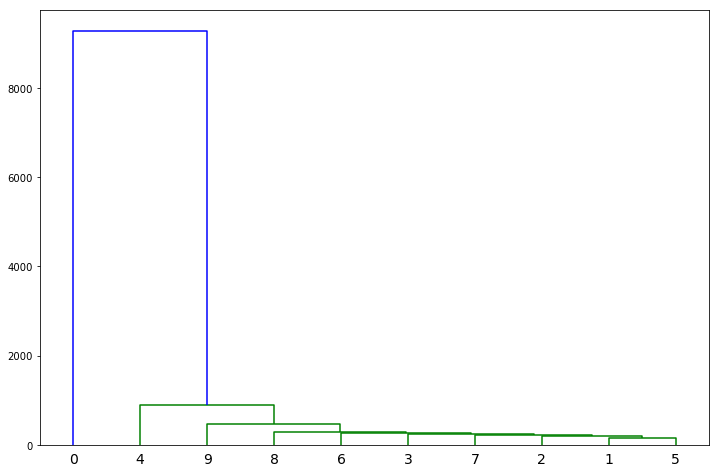

In [61]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline

Z_lda = linkage(lda.components_, 'complete')
plt.figure(figsize=(12, 8))
dendrogram(Z_lda, leaf_font_size=14)
plt.show()

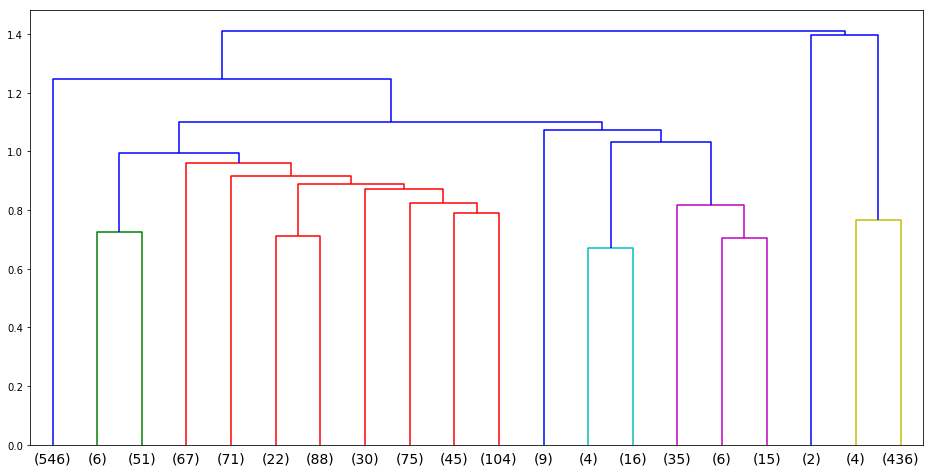

In [37]:
Z_lda = linkage(lda_topics, 'complete')
plt.figure(figsize=(16, 8))
dendrogram(
    Z_lda,
    truncate_mode='lastp',  # mostrar sólo los últims p clusters
    p=20,                   
    show_leaf_counts=True,  # mostrar entre paréntesis el número de elementos en cada cluster
    leaf_font_size=14.,
)
plt.show()

## Factorización de matrices no negativas (NNMF o NMF)

Una forma muy común de representar una colección de documentos es mediante una matriz documentos-términos. En una matriz donde los renglones representan documentos y las columnas corresponden a los términos/tokens utilizados en el corpus. Las celdas suelen contener medidas de importancia de cada término en un documento dado. Una desventaja es que al utilizar estas matrices para representar la colección de documentos es la cantidad, de atributos que es muy grande.

In [62]:
num_topics = 10
# Creación del operador
nmf = decomposition.NMF(n_components=num_topics)
# Factorización de la matriz documentos-términos
nmf_topics = nmf.fit_transform(X)

print("Tamaño de la matriz original (V):", X.shape)
print("Tamaño de la matriz de coeficientes (W):", nmf_topics.shape)
print("Tamaño de la matriz diccionario (H):", nmf.components_.shape)

Tamaño de la matriz original (V): (1632, 87901)
Tamaño de la matriz de coeficientes (W): (1632, 10)
Tamaño de la matriz diccionario (H): (10, 87901)


A continuación mostramos como se estructuraron los tópicos (la forma en que cada nuevo rasgo se relaciona con los atributos originales):

In [63]:
# Atributos originales a mostrar en cada vector de características, 
# ordenados por importancia       
num_top_words = 50
nmf_topic_words = []
for topic in nmf.components_:
    word_idx = np.argsort(topic)[::-1][0:num_top_words]
    nmf_topic_words.append([X_vocab[i] for i in word_idx])

for i, row in zip(range(len(nmf_topic_words)), nmf_topic_words):
    print(i, row, "\n")

0 ['gluten', 'dieta', 'enfermedad_celíaca', 'celíacos', 'presencia', 'sensibilidad', 'alimentos', 'casos', 'pacientes', 'dsg', 'style_background', 'celíaca', 'biopsias_duodenales', 'productos', 'diagnóstico', 'atrofia', 'síntomas', 'especialmente', 'adultos', 'solo', 'valign_top', 'prueba', 'vida', 'incluso', 'anticuerpos', 'align_center', 'actualmente', 'hla', 'etc', 'forma', 'paciente', 'años', 'avena', 'marsh', 'serología', 'marcadores', 'aparición', 'general', 'contaminación', 'intestinal', 'trigo', 'intolerancia', 'niños_mayores', 'riesgo', 'tales', 'niños', 'mejoría', 'cruzada', 'completa', 'contaminaciones'] 

1 ['cáncer', 'pulmón', 'mama', 'tumor', 'células', 'tumores', 'tabaco', 'metástasis', 'tratamiento', 'riesgo', 'cánceres', 'mujeres', 'crecimiento', 'carcinoma', 'aparición', 'quimioterapia', 'células_pequeñas', 'casos', 'fumadores', 'pacientes', 'consultado', 'cancer', 'factores', 'bgcolor', 'diagnóstico', 'incidencia', 'mortalidad', 'exposición', 'posible', 'aunque', 'pe

Por otra parte, cada documento queda representado por $k$ coeficientes que describen la "pertenencia" del documento a cada tópico:

In [64]:
# Normalizar la matriz de coeficientes
nmf_topic_norm = nmf_topics / np.sum(nmf_topics, axis=1, keepdims=True) 

# Obtener los títulos de los documentos
page_titles = np.asarray(list(enfDf.nombre))

num_groups = len(set(page_titles))
nmf_topic_grouped = np.zeros((num_groups, num_topics))
for i, name in enumerate(sorted(set(page_titles))):
    # Promedios, útiles cuando hay documentos con títulos repetidos
    nmf_topic_grouped[i, :] = np.mean(nmf_topic_norm[page_titles == name, :], axis=0)

nmf_pages = pd.DataFrame(data=nmf_topic_grouped, index=page_titles, 
                   columns=["T" + str(i) for i in range(num_topics)])

display(nmf_pages[0:20])
display(nmf_pages[500:520])
display(nmf_pages[1000:1020])

,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9
Infantilismo,0.035666,0.013708,0.000000,0.052250,0.174538,0.580998,0.000000,0.000000,0.000000,0.142841
Pectus excavatum,0.030279,0.000000,0.153002,0.006063,0.351638,0.243713,0.111313,0.000000,0.000000,0.103991
Pectus carinatum,0.335696,0.152298,0.083045,0.000000,0.021911,0.085361,0.000000,0.321690,0.000000,0.000000
Onfalocele,0.012358,0.000000,0.057811,0.000841,0.172813,0.201750,0.000000,0.036657,0.255006,0.262764
Período prepatogénico,0.020397,0.174100,0.154086,0.058237,0.193506,0.081263,0.033506,0.058172,0.104902,0.121830
Enfermedad gastrointestinal,0.019520,0.049998,0.094066,0.005024,0.337660,0.067829,0.146076,0.025744,0.117173,0.136910
Mal de montaña crónico,0.067305,0.043818,0.281336,0.016045,0.087112,0.323195,0.147076,0.000000,0.000000,0.034113
Fibrosis,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Meteoropatía,0.000000,0.000000,0.047644,0.004995,0.652508,0.000000,0.076602,0.000000,0.099944,0.118305
Linfangitis,0.100778,0.019225,0.209216,0.021134,0.156634,0.285273,0.076141,0.000000,0.025228,0.106371


,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9
Glucogenosis tipo III,0.017474,0.117496,0.112180,0.032463,0.363399,0.076568,0.055016,0.158948,0.000000,0.066455
Síndrome de Larsen,0.000000,0.000000,0.000000,0.000000,0.866421,0.000000,0.023625,0.000000,0.000000,0.109954
Criptosporidiosis,0.009105,0.116034,0.039839,0.069811,0.347376,0.327052,0.013553,0.077230,0.000000,0.000000
Síndrome poliglandular autoinmune,0.028591,0.008093,0.156385,0.141901,0.385946,0.114947,0.000000,0.070680,0.093457,0.000000
Botulismo,0.000000,0.000000,0.000000,0.109010,0.306396,0.059888,0.000000,0.524707,0.000000,0.000000
Adiposis dolorosa,0.038670,0.145120,0.326513,0.041174,0.231684,0.150735,0.000000,0.066104,0.000000,0.000000
Neuralgia del glosofaríngeo,0.125001,0.098043,0.048680,0.067424,0.247776,0.152771,0.077928,0.151428,0.026514,0.004435
Síndrome de Young,0.000000,0.000000,0.139164,0.000000,0.432744,0.428092,0.000000,0.000000,0.000000,0.000000
Insomnio familiar fatal,0.000000,0.001361,0.098052,0.102256,0.345916,0.236334,0.064337,0.053224,0.044325,0.054195
Síndrome de Muenke,0.096791,0.000000,0.044906,0.027711,0.266663,0.166143,0.029699,0.064716,0.167596,0.135777


,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9
Síndrome de Felty,0.026154,0.148433,0.217505,0.136895,0.264475,0.080092,0.047175,0.079271,0.000000,0.000000
Enfermedad de Still,0.044235,0.031003,0.195740,0.030335,0.321606,0.135649,0.006521,0.068636,0.076106,0.090171
Síndrome de Couvade,0.052569,0.045841,0.052209,0.041541,0.313537,0.339532,0.000000,0.021881,0.132891,0.000000
Síndrome de Netter,0.007925,0.000000,0.184684,0.003113,0.200774,0.186410,0.000000,0.194179,0.136844,0.086072
Síndrome de Mirizzi,0.000000,0.012339,0.040721,0.000000,0.629943,0.178855,0.000000,0.085794,0.052348,0.000000
Síndrome de Meigs,0.000000,0.081337,0.068145,0.000000,0.850517,0.000000,0.000000,0.000000,0.000000,0.000000
Enfermedad de Köhler,0.035784,0.000000,0.024262,0.000000,0.255528,0.141098,0.169135,0.003914,0.000000,0.370278
Trastorno de somatización,0.066945,0.118126,0.149859,0.138834,0.247082,0.142967,0.037094,0.077045,0.022048,0.000000
Síndrome de Ackerman,0.000000,0.000000,0.030135,0.000000,0.186833,0.000000,0.023959,0.039369,0.027710,0.691994
Hemorragia de Duret,0.030121,0.175980,0.060326,0.063173,0.164207,0.231178,0.000000,0.091627,0.119515,0.063874


Dendogramas

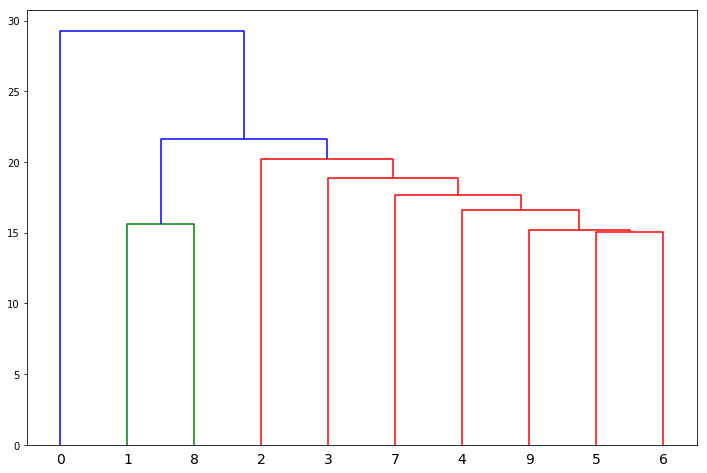

In [65]:
Z_nmf = linkage(nmf.components_, 'complete')
plt.figure(figsize=(12, 8))
dendrogram(Z_nmf, leaf_font_size=14)
plt.show()

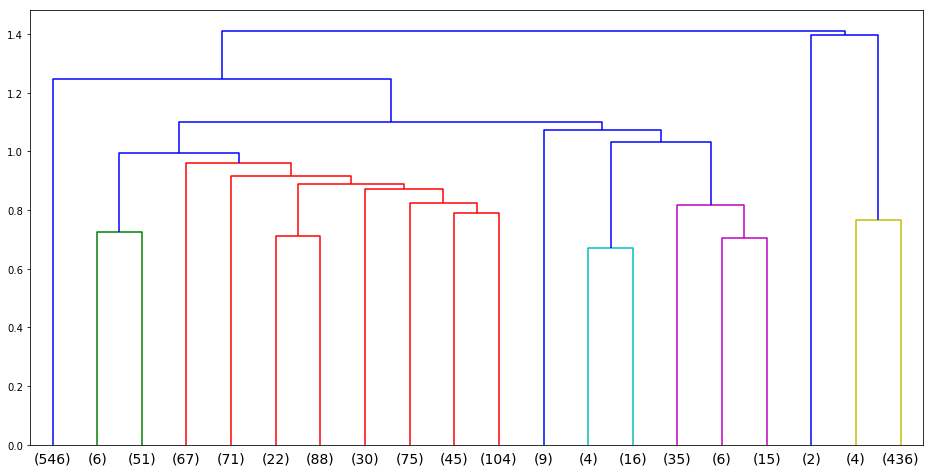

In [43]:
Z_nmf = linkage(lda_topics, 'complete')
plt.figure(figsize=(16, 8))
dendrogram(
    Z_nmf,
    truncate_mode='lastp',  # mostrar sólo los últims p clusters
    p=20,                   
    show_leaf_counts=True,  # mostrar entre paréntesis el número de elementos en cada cluster
    leaf_font_size=14.,
)
plt.show()

## Mejorando el Lexicón

In [66]:
# Crear el contador. Especificamos las palabras de paro
vectorizer_global = CountVectorizer()#stop_words='spanish' no hay soporte en español
# Construir la matriz documentos-términos
X_global = vectorizer_global.fit_transform(enfDf.descripcion)
X_global_array = X_global.toarray()
X_global_vocab = np.array(vectorizer_global.get_feature_names())

print("Se generó una matriz de tamaño:", X_global.shape)

num_topics = 10
# Creación del operador. En la versión 0.19, el argumento n_topics cambia a n_components
lda_global = decomposition.LatentDirichletAllocation(n_topics=num_topics,
                                              learning_method='online')
# Factorización de la matriz documentos-términos
lda_global_topics = lda_global.fit_transform(X_global)

Se generó una matriz de tamaño: (1632, 67632)


In [67]:
# Atributos originales a mostrar en cada vector de características, 
# ordenados por importancia       
num_top_words = 100
lda_global_topic_words = []
for topic in lda_global.components_:
    word_idx = np.argsort(topic)[::-1][0:num_top_words]
    lda_global_topic_words.append([X_global_vocab[i] for i in word_idx])

for i, row in zip(range(len(lda_global_topic_words)), lda_global_topic_words):
    print(i, row, "\n")

0 ['de', 'la', 'en', 'el', 'que', 'los', 'se', 'del', 'con', 'una', 'un', 'las', 'por', 'es', 'no', 'para', 'como', 'enfermedad', 'al', 'más', 'puede', 'síndrome', 'son', 'categoría', 'su', 'enfermedades', 'tratamiento', 'cáncer', 'también', 'lo', 'pueden', 'ser', 'síntomas', 'pacientes', 'casos', 'entre', 'este', 'esta', 'diagnóstico', 'sin', 'si', 'ha', 'tipo', 'años', 'pero', 'otros', 'células', 'han', 'forma', 'está', 'cuando', 'durante', 'estos', 'paciente', 'muy', 'sobre', 'otras', 'algunos', 'personas', 'dos', 'aunque', 'niños', 'sus', 'gen', 'riesgo', 'of', 'dolor', 'causa', 'tienen', 'desarrollo', 'mayor', 'referencias', 'parte', 'hay', 'debido', 'cada', 'sistema', 'caso', 'tiene', 'edad', 'vida', 'debe', 'trastornos', 'hasta', 'después', 'ya', 'general', 'menos', 'embargo', 'trastorno', 'tumor', 'and', 'estudios', 'fue', 'tanto', 'presencia', 'tumores', 'sangre', 'están', 'cromosoma'] 

1 ['de', 'la', 'en', 'el', 'por', 'los', 'que', 'las', 'se', 'con', 'virus', 'del', 'al', 

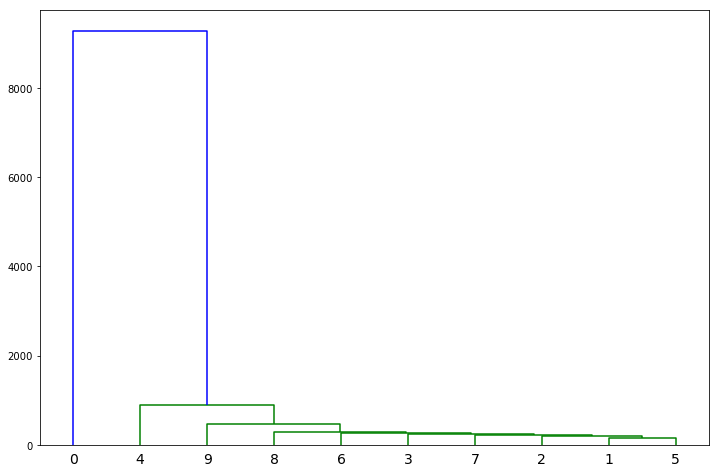

In [68]:
Z_lda = linkage(lda.components_, 'complete')
plt.figure(figsize=(12, 8))
dendrogram(Z_lda, leaf_font_size=14)
plt.show()

La distribución de probabilidades de palabras en los prototipos de tópico pueden, por otra parte, ayudarnos a reducir los términos en el lexicón. Consideremos los siguientes términos, seleccionados en base a su frecuencia en los tópicos, según el método LDA:

In [69]:
df = pd.DataFrame(lda.components_)

to_eliminate_lda = []
preserve = []
for i, col in zip(range(df.shape[1]), df):
    m = np.mean(df[col])
    if m < 2.5e-1: # Seleccionar palabras con frecuencia menor a 0.1
        r = 0
        w = X_vocab[i]
        for row in enfDf.nueva_descripcion:
            if re.match(w, row): # conservar los nombres de página como token
                preserve.append(w)
                break
            r += 1
        if r == len(enfDf):
            to_eliminate_lda.append(w)
            if len(to_eliminate_lda) < 50:
                print(m, w)

print("\nPalabras preseleccionadas para eliminación", len(to_eliminate_lda), '\n')

0.20741045593997437 aba_españa_asociación
0.1977048949679614 abandono_terapéutico
0.21430730610309218 abarcan_ancianos_bebés
0.18315557972510338 abarcar_problemas_cognitivos
0.21081947679745472 abc_boone
0.1859053696374085 abcd
0.19771034056548126 abdomen_abierto
0.20407881957281804 abdomen_así
0.19462339884270058 abdomen_aumento
0.19770151936998617 abdomen_bajo_gasto_cardíaco
0.210821678942365 abdomen_compartiendo
0.21431252326839528 abdomen_cuadro_clínico
0.1831400854750449 abdomen_distensión_abdominal
0.20407537625340985 abdomen_endoscopia_digestiva
0.20407086882274078 abdomen_específicamente
0.18048119611689506 abdomen_esquizofrenia
0.19462217525136735 abdomen_hernia_inguinal
0.21082845099455091 abdomen_nacieron
0.197703970571592 abdomen_onfalocele_extrofia_vesical
0.20407867884433775 abdomen_peritoneo
0.1976907037239552 abdomen_realizar_drenaje
0.18048747355341122 abdomen_si
0.2143275007846424 abdomen_similar
0.21081685852191603 abdomen_sospecha
0.21082299117633907 abdomen_tomada


De manera semejante, las palabras de baja frecuencias, de acuerdo al método NMF, son:

In [70]:
df = pd.DataFrame(nmf.components_)

to_eliminate_nmf = []
preserve = []
for i, col in zip(range(df.shape[1]), df):
    m = np.mean(df[col])
    if m < 2e-4:
        r = 0
        w = X_vocab[i]
        for row in enfDf.nueva_descripcion:
            if re.match(w, row): 
                preserve.append(w)
                break
            r += 1
        if r == len(enfDf):
            to_eliminate_nmf.append(w)
            if len(to_eliminate_nmf) < 50:
                print(m, w)

print("\nPalabras preseleccionadas para eliminación", len(to_eliminate_nmf), '\n')

9.538900699168108e-05 aarskog
9.538900699168108e-05 aarskog_scott
0.00012756560983646868 aba_españa
6.378280491823434e-05 aba_españa_asociación
6.80570329771437e-05 abandono_terapéutico
4.944336442446113e-05 abarcan_ancianos_bebés
1.9605852114546536e-05 abarcar_problemas_cognitivos
3.52923223555732e-05 abc_boone
9.659132939089787e-05 abcd
3.599877670834666e-05 abdomen_abierto
9.595581930344713e-05 abdomen_así
3.599877670834666e-05 abdomen_bajo_gasto_cardíaco
3.333352896148617e-05 abdomen_compartiendo
4.421255486024342e-05 abdomen_cuadro_clínico
0.00012023782931610974 abdomen_diagnóstico
0.00012145315003293661 abdomen_distensión_abdominal
5.418889354227664e-05 abdomen_endoscopia_digestiva
5.435995422172392e-05 abdomen_específicamente
6.319518729493192e-05 abdomen_esquizofrenia
0.0001810398821459665 abdomen_hernia_inguinal
0.0001528555603647824 abdomen_infecciones_pérdida_súbita
1.5302156989468016e-05 abdomen_mientras
3.333352896148617e-05 abdomen_nacieron
0.0001528555603647824 abdomen_n

In [71]:
dif = list(set(to_eliminate_lda) - set(to_eliminate_nmf))
matches = list(set(to_eliminate_lda) & set(to_eliminate_nmf))

matches_array = np.array(matches[:60])
matches_array = np.reshape(matches_array, (30, 2))
matches_df = pd.DataFrame(matches_array)

display(matches_df)
print("\nPalabras coincidentes", len(matches))

,0,1
0,chocolate_rigidez_muscular,tiroiditis_linfocítica_crónica
1,press_british_medical_journal,realiza_cálculo_mental
2,criterios_diagnóstico_síndrome_zollinger_ellison,misma_queja
3,b_cam,vea_comprometido
4,dermatology_artículo,intestino_tales_cambios
5,extremidades_edema_duro,conjugada_causando
6,género_bartonella_principalmente,dientes_enlaces_externos
7,high_magjpg_thumb,éstos_podrían
8,ojos_pérdida,aquel_cuyo
9,mujeres_infertilidad,mano_particularmente



Palabras coincidentes 35271


In [72]:
rest = list(set(to_eliminate_lda + to_eliminate_nmf) - set(matches))
for w in rest:
    if '_' in w:
        matches.append(w)
matches = sorted(matches)

print("\nPalabras limpias preseleccionadas para eliminación", len(matches))


Palabras limpias preseleccionadas para eliminación 52043


Reescribimos la descripción, eliminando las palabras indeseadas y volvemos a realizar la identificación de tópicos:

In [74]:
enfDf["descripcion_limpia"] = list(map(lambda row: 
                            " ".join([w for w in row.split() if not w in matches]), 
                            enfDf.nueva_descripcion))

In [75]:
# Crear el contador
vectorizer = CountVectorizer()
# Construir la matriz documentos-términos
X = vectorizer.fit_transform(enfDf.descripcion_limpia)
X_array = X.toarray()
X_vocab = np.array(vectorizer.get_feature_names())
        
print("Se generó una matriz de tamaño:", X.shape)

Se generó una matriz de tamaño: (1632, 35858)


In [76]:
num_topics = 10
# Creación del operador. En la versión 0.19, el argumento n_topics cambia a n_components
lda = decomposition.LatentDirichletAllocation(n_topics=num_topics,
                                              learning_method='online')
# Factorización de la matriz documentos-términos
lda_topics = lda.fit_transform(X)

print("Tamaño de la matriz documentos-términos:", X.shape)
print("Tamaño de la matriz de distribución documentos-tópicos:", lda_topics.shape)
print("Tamaño de la matriz de distribución tópicos-términos:", lda.components_.shape)

Tamaño de la matriz documentos-términos: (1632, 35858)
Tamaño de la matriz de distribución documentos-tópicos: (1632, 10)
Tamaño de la matriz de distribución tópicos-términos: (10, 35858)


In [77]:
# Atributos originales a mostrar en cada vector de características, 
# ordenados por importancia       
num_top_words = 50
lda_topic_words = []
for topic in lda.components_:
    word_idx = np.argsort(topic)[::-1][0:num_top_words]
    lda_topic_words.append([X_vocab[i] for i in word_idx])

for i, row in zip(range(len(lda_topic_words)), lda_topic_words):
    print(i, row, "\n")

0 ['enfermedad', 'síndrome', 'casos', 'pacientes', 'tratamiento', 'enfermedades_raras', 'síntomas', 'diagnóstico', 'forma', 'desarrollo', 'vida', 'embargo', 'caso', 'debido', 'mayoría', 'aunque', 'pérdida', 'personas', 'niños', 'si', 'aparición', 'crecimiento', 'presencia', 'células', 'enfermedades', 'afecta', 'caracteriza', 'cerebro', 'grupo', 'paciente', 'problemas', 'frecuente', 'alteraciones', 'produce', 'piel', 'años', 'referencias', 'deficiencia', 'común', 'edad', 'puede_ser', 'mutaciones', 'función', 'causa', 'nombre', 'adn', 'presenta', 'además', 'ausencia', 'mujeres'] 

1 ['autismo', 'niños', 'síndrome', 'trastorno', 'personas', 'niño', 'trastornos', 'asperger', 'atención', 'tdah', 'padres', 'espectro_autista', 'comportamiento', 'trabajo', 'madre', 'dsm', 'problemas', 'padre', 'desarrollo', 'mismo', 'parte', 'social', 'the', 'persona', 'investigación', 'ser', 'sap', 'relación', 'conducta', 'hijos', 'of', 'teoría', 'unidos', 'falta', 'sido', 'casos', 'dificultades', 'ejemplo', 

In [78]:
# Normalizar la matriz de coeficientes
lda_topics_norm = lda_topics / np.sum(lda_topics, axis=1, keepdims=True) 

# Obtener los títulos de los documentos
page_titles = np.asarray(list(enfDf.nombre))

num_groups = len(set(page_titles))
lda_topics_grouped = np.zeros((num_groups, num_topics))
for i, name in enumerate(sorted(set(page_titles))):
    # Promedios, útiles cuando hay documentos con títulos repetidos
    lda_topics_grouped[i, :] = np.mean(lda_topics_norm[page_titles == name, :], axis=0)

lda_pages = pd.DataFrame(data=lda_topics_grouped, index=page_titles, 
                   columns=["T" + str(i) for i in range(num_topics)])

display(lda_pages[0:20])

,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9
Infantilismo,0.913812,0.078848,0.000918,0.000917,0.000917,0.000917,0.000918,0.000917,0.000917,0.000917
Pectus excavatum,0.798002,0.001075,0.001075,0.001075,0.001075,0.001075,0.094147,0.100324,0.001075,0.001075
Pectus carinatum,0.240349,0.001235,0.636319,0.001235,0.001235,0.001235,0.114689,0.001235,0.001235,0.001235
Onfalocele,0.459009,0.001333,0.001333,0.001333,0.001333,0.001333,0.530323,0.001333,0.001333,0.001333
Período prepatogénico,0.066079,0.000495,0.000495,0.000495,0.000495,0.000495,0.929960,0.000495,0.000495,0.000495
Enfermedad gastrointestinal,0.211560,0.254699,0.000133,0.000133,0.000133,0.000133,0.532813,0.000133,0.000133,0.000133
Mal de montaña crónico,0.987499,0.001389,0.001389,0.001389,0.001389,0.001390,0.001389,0.001389,0.001389,0.001389
Fibrosis,0.970300,0.001266,0.019573,0.001266,0.001266,0.001266,0.001266,0.001266,0.001266,0.001266
Meteoropatía,0.565253,0.001667,0.001667,0.001667,0.001667,0.001667,0.421413,0.001667,0.001667,0.001667
Linfangitis,0.988461,0.001282,0.001282,0.001282,0.001282,0.001282,0.001282,0.001282,0.001282,0.001282


In [79]:
num_topics = 10
# Creación del operador
nmf = decomposition.NMF(n_components=num_topics)
# Factorización de la matriz documentos-términos
nmf_topics = nmf.fit_transform(X)

print("Tamaño de la matriz original (V):", X.shape)
print("Tamaño de la matriz de coeficientes (W):", nmf_topics.shape)
print("Tamaño de la matriz diccionario (H):", nmf.components_.shape)

Tamaño de la matriz original (V): (1632, 35858)
Tamaño de la matriz de coeficientes (W): (1632, 10)
Tamaño de la matriz diccionario (H): (10, 35858)


In [80]:
# Atributos originales a mostrar en cada vector de características, 
# ordenados por importancia       
num_top_words = 50
nmf_topic_words = []
for topic in nmf.components_:
    word_idx = np.argsort(topic)[::-1][0:num_top_words]
    nmf_topic_words.append([X_vocab[i] for i in word_idx])

for i, row in zip(range(len(nmf_topic_words)), nmf_topic_words):
    print(i, row, "\n")

0 ['gluten', 'dieta', 'enfermedad_celíaca', 'celíacos', 'presencia', 'sensibilidad', 'alimentos', 'casos', 'pacientes', 'dsg', 'style_background', 'celíaca', 'biopsias_duodenales', 'productos', 'diagnóstico', 'atrofia', 'síntomas', 'especialmente', 'adultos', 'solo', 'valign_top', 'prueba', 'vida', 'incluso', 'anticuerpos', 'align_center', 'actualmente', 'hla', 'etc', 'forma', 'paciente', 'años', 'avena', 'marsh', 'serología', 'marcadores', 'aparición', 'general', 'contaminación', 'intestinal', 'trigo', 'intolerancia', 'niños_mayores', 'riesgo', 'tales', 'niños', 'mejoría', 'cruzada', 'completa', 'contaminaciones'] 

1 ['cáncer', 'pulmón', 'mama', 'tumor', 'células', 'tumores', 'tabaco', 'metástasis', 'tratamiento', 'riesgo', 'cánceres', 'mujeres', 'crecimiento', 'carcinoma', 'aparición', 'quimioterapia', 'células_pequeñas', 'casos', 'fumadores', 'pacientes', 'consultado', 'cancer', 'factores', 'bgcolor', 'diagnóstico', 'incidencia', 'mortalidad', 'exposición', 'posible', 'aunque', 'pá

In [81]:
# Normalizar la matriz de coeficientes
nmf_topic_norm = nmf_topics / np.sum(nmf_topics, axis=1, keepdims=True) 

# Obtener los títulos de los documentos
page_titles = np.asarray(list(enfDf.nombre))

num_groups = len(set(page_titles))
nmf_topic_grouped = np.zeros((num_groups, num_topics))
for i, name in enumerate(sorted(set(page_titles))):
    # Promedios, útiles cuando hay documentos con títulos repetidos
    nmf_topic_grouped[i, :] = np.mean(nmf_topic_norm[page_titles == name, :], axis=0)

nmf_pages = pd.DataFrame(data=nmf_topic_grouped, index=page_titles, 
                   columns=["T" + str(i) for i in range(num_topics)])

display(nmf_pages[0:20])
display(nmf_pages[500:520])
display(nmf_pages[1000:1020])

,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9
Infantilismo,0.035711,0.013690,0.000000,0.052364,0.174754,0.580488,0.000000,0.000000,0.000000,0.142993
Pectus excavatum,0.030200,0.000000,0.153323,0.005972,0.351429,0.242911,0.112319,0.000000,0.000000,0.103845
Pectus carinatum,0.335868,0.152317,0.083202,0.000000,0.022082,0.085302,0.000000,0.321229,0.000000,0.000000
Onfalocele,0.012313,0.000000,0.057912,0.000880,0.172962,0.201415,0.000000,0.036497,0.255156,0.262864
Período prepatogénico,0.020368,0.174168,0.154311,0.058336,0.193487,0.080991,0.033751,0.057949,0.104778,0.121862
Enfermedad gastrointestinal,0.019435,0.050033,0.094144,0.005012,0.337311,0.067464,0.147342,0.025585,0.116895,0.136780
Mal de montaña crónico,0.067223,0.043716,0.281850,0.015923,0.086912,0.322040,0.148376,0.000000,0.000000,0.033960
Fibrosis,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Meteoropatía,0.000000,0.000000,0.047612,0.004935,0.652221,0.000000,0.077185,0.000000,0.099835,0.118211
Linfangitis,0.100773,0.019132,0.209369,0.021046,0.156664,0.284644,0.076830,0.000000,0.025237,0.106304


,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9
Glucogenosis tipo III,0.017442,0.117424,0.112398,0.032622,0.363162,0.076382,0.055481,0.158531,0.000000,0.066559
Síndrome de Larsen,0.000000,0.000000,0.000000,0.000000,0.866371,0.000000,0.023849,0.000000,0.000000,0.109780
Criptosporidiosis,0.009057,0.116039,0.039951,0.070000,0.347610,0.326679,0.013631,0.077034,0.000000,0.000000
Síndrome poliglandular autoinmune,0.028561,0.008146,0.156630,0.142101,0.385954,0.114754,0.000000,0.070450,0.093405,0.000000
Botulismo,0.000000,0.000000,0.000000,0.109274,0.306591,0.059896,0.000000,0.524239,0.000000,0.000000
Adiposis dolorosa,0.038618,0.145004,0.327141,0.041263,0.231762,0.150390,0.000000,0.065822,0.000000,0.000000
Neuralgia del glosofaríngeo,0.124956,0.097982,0.048737,0.067555,0.247770,0.152439,0.078697,0.151065,0.026443,0.004356
Síndrome de Young,0.000000,0.000000,0.139279,0.000000,0.433025,0.427697,0.000000,0.000000,0.000000,0.000000
Insomnio familiar fatal,0.000000,0.001395,0.098292,0.102385,0.345697,0.235750,0.064939,0.053028,0.044262,0.054252
Síndrome de Muenke,0.096792,0.000000,0.044962,0.027784,0.266801,0.165824,0.029846,0.064519,0.167657,0.135816


,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9
Síndrome de Felty,0.026113,0.148299,0.217780,0.137068,0.264325,0.079841,0.047596,0.078978,0.000000,0.000000
Enfermedad de Still,0.044205,0.031059,0.196133,0.030386,0.321729,0.135341,0.006446,0.068480,0.076017,0.090204
Síndrome de Couvade,0.052548,0.045854,0.052426,0.041631,0.313821,0.339074,0.000000,0.021647,0.133000,0.000000
Síndrome de Netter,0.007897,0.000000,0.184865,0.003192,0.200921,0.186112,0.000000,0.193994,0.136995,0.086024
Síndrome de Mirizzi,0.000000,0.012204,0.040859,0.000000,0.630296,0.178505,0.000000,0.085677,0.052459,0.000000
Síndrome de Meigs,0.000000,0.081152,0.068154,0.000000,0.850694,0.000000,0.000000,0.000000,0.000000,0.000000
Enfermedad de Köhler,0.035728,0.000000,0.024298,0.000000,0.255244,0.140577,0.170616,0.003837,0.000000,0.369701
Trastorno de somatización,0.066932,0.118056,0.150151,0.139000,0.247102,0.142563,0.037416,0.076775,0.022005,0.000000
Síndrome de Ackerman,0.000000,0.000000,0.030189,0.000000,0.186989,0.000000,0.024178,0.039333,0.027690,0.691621
Hemorragia de Duret,0.030124,0.176169,0.060515,0.063340,0.164313,0.230718,0.000000,0.091416,0.119447,0.063957


In [82]:
df = pd.DataFrame(lda.components_)

to_eliminate_lda = []
for i, col in zip(range(df.shape[1]), df):
    w = X_vocab[i]
    if not w in preserve:
        m = np.mean(df[col])
        if m < 5e-1: # Flexibilizamos la identificación de palabras no significativas
            r = 0
            for row in enfDf.descripcion_limpia:
                if re.match(w, row): 
                    preserve.append(w)
                    break
                r += 1
            if r == len(enfDf):
                to_eliminate_lda.append(w)
                if len(to_eliminate_lda) < 50:
                    print(m, w)
                
print("\nPalabras preseleccionadas para eliminación", len(to_eliminate_lda), '\n')


0.271572835264449 aarskog
0.3022313585825055 abdomen_abdominales
0.4947288295441469 abdomen_agudo
0.3868251478260322 abdomen_distendido
0.3428180081946152 abdomen_ombligo
0.2891256014185882 abdomen_pecho
0.3610065035311588 abdomen_siendo
0.26608516249602354 abdomen_tomografía_computarizada
0.432000835101196 abedul
0.3284167543991888 aberraciones
0.2660761065407923 aberraciones_cromosómicas
0.3984138246196876 aberración
0.1831672341134538 abl
0.4778487713097408 abnormal
0.4880298960746939 abnormalities
0.44603332556715475 abordaje_terapéutico
0.31494304425327113 abordajes_quirúrgicos
0.18874356897521588 abortus
0.295918581453744 about_his
0.4118044054243836 abril_consultado
0.41405709003656155 abril_mayo_vol
0.4880195982647565 absceso_cerebral
0.38649863609084756 absolutamente
0.31817022738947043 absolutamente_contraindicada
0.31818231533457925 absolutamente_contraindicado
0.28903588194063157 abstinencia_aguda
0.38344636373567526 abstinencia_prolongada
0.38342989047514575 abstinencia_pr

In [83]:
df = pd.DataFrame(nmf.components_)

to_eliminate_nmf = []
for i, col in zip(range(df.shape[1]), df):
    w = X_vocab[i]
    if not w in preserve:
        m = np.mean(df[col])
        if m < 1e-3:
            r = 0
            for row in enfDf.descripcion_limpia:
                if re.match(w, row): 
                    preserve.append(w)
                    break
                r += 1
            if r == len(enfDf):
                to_eliminate_nmf.append(w)
                if len(to_eliminate_nmf) < 50:
                    print(m, w)

print("\nPalabras preseleccionadas para eliminación", len(to_eliminate_nmf), '\n')

9.553467668306804e-05 aarskog
0.00041420445364443576 abdomen_agudo
0.0006869340322976828 abdomen_distendido
0.0005296417572372492 abdomen_siendo
0.00024310523886426804 abdomen_tomografía_computarizada
0.0006569232053010479 abducción
0.0003436329613618344 abedul
0.00039924273311121026 aberraciones_cromosómicas
0.0005903982756815029 aberración
0.0003266874492344761 abl
0.0005415827240501305 abortus
0.00022986438599539332 about_his
0.0003231448339183401 abril_mayo_vol
0.0002273476818461351 abundante_secreción_mucinosa
0.0005960156703955668 acaba_afectando
0.00033472600171071564 acabar
0.0005125732725497941 academy
0.0009517920030021127 academy_of
0.000964744254009949 acalasia_esofágica
0.0009724916439351056 acantocitosis
0.0002049021403824057 acantosis_pigmentaria
0.0009350169096177568 acaparador_compulsivo_trastorno
0.0009350169096177568 acaparadores_compulsivos
0.00045122635389511633 acceso_rápido
0.0004468333761558199 accessed_april
0.00024316096951038294 accidente_cerebro_vascular
0.0

In [85]:
dif = list(set(to_eliminate_lda) - set(to_eliminate_nmf))
matches = list(set(to_eliminate_lda) & set(to_eliminate_nmf))

rest = list(set(to_eliminate_lda + to_eliminate_nmf) - set(matches))
for w in rest:
    if '_' in w:
        matches.append(w)
matches = sorted(matches)

print("\nPalabras limpias preseleccionadas para eliminación", len(matches))


Palabras limpias preseleccionadas para eliminación 13875


In [86]:
print(matches)

['aarskog', 'abdomen_abdominales', 'abdomen_agudo', 'abdomen_distendido', 'abdomen_ombligo', 'abdomen_pecho', 'abdomen_siendo', 'abdomen_tomografía_computarizada', 'abedul', 'aberraciones_cromosómicas', 'aberración', 'abl', 'abordaje_terapéutico', 'abordajes_quirúrgicos', 'abortus', 'about_his', 'abril_consultado', 'abril_mayo_vol', 'absceso_cerebral', 'absolutamente_contraindicada', 'absolutamente_contraindicado', 'abstinencia_aguda', 'abstinencia_prolongada', 'abstinencia_prolongados', 'abstinencia_pueden', 'abundante_producción', 'abundante_secreción_mucinosa', 'acaba_afectando', 'acabar', 'academia_d_conocida', 'academy', 'academy_of', 'acalasia_esofágica', 'acantocitosis', 'acantosis_pigmentaria', 'acaparador_compulsivo_trastorno', 'acaparadores_compulsivos', 'acceso_rápido', 'accessed_april', 'accessed_on', 'accidente_cerebro_vascular', 'accidente_isquémico_transitorio', 'accidente_nuclear', 'accidentes_vasculares', 'acciones_involuntarias', 'acción_diferente', 'acción_farmacológ

In [87]:
preserve = preserve + ['cáncer_laríngeo','daño_neuronal','debilidad_músculos_respiratorios','degeneración_cerebral',
                      'derrame_pericárdico','descongestionantes','desequilibrio_hormonal','desórdenes_mentales',
                      'diarrea_aguda','disfunción_neuronal','disfunción_motora','enfermedad_biliar','enfermedad_extremadamente_rara',
                      'enfermedad_incurable','enfermedad_hígado','enfermedad_oncológica','enfermedad_invasiva','enfermedad_similar',
                      'esclerosis_concéntrica','espasmos_epilépticos','escoliosis_cifosis','falla_respiratoria','fallo_metabólico',
                      'lipidosis_enfermedad','región_nasal','respiración_anormal']

for w in preserve:
    if w in matches:
        matches.remove(w)

print("Palabras limpias preseleccionadas para eliminación", len(set(matches)))

Palabras limpias preseleccionadas para eliminación 13849


In [89]:
enfDf["descripcion_limpia"] = list(map(lambda row: 
                            " ".join([w for w in row.split() if not w in matches]), 
                            enfDf.descripcion_limpia))

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(enfDf.descripcion_limpia)
X_array = X.toarray()
X_vocab = np.array(vectorizer.get_feature_names())
        
print("Se generó una matriz de tamaño:", X.shape)

Se generó una matriz de tamaño: (1632, 22009)


In [90]:
num_topics = 8

# Creación del operador. En la versión 0.19, el argumento n_topics cambia a n_components
lda = decomposition.LatentDirichletAllocation(n_topics=num_topics,
                                              learning_method='online')
lda_topics = lda.fit_transform(X)
df = pd.DataFrame(lda.components_)
to_eliminate_lda = []
for i, col in zip(range(df.shape[1]), df):
    w = X_vocab[i]
    if not w in preserve:
        m = np.mean(df[col])
        if m < 1.5: # Flexibilizamos la identificación de palabras no significativas
            r = 0
            for row in enfDf.descripcion_limpia:
                if re.match(w, row): 
                    preserve.append(w)
                    break
                r += 1
            if r == len(enfDf):
                to_eliminate_lda.append(w)
print("\nPalabras preseleccionadas para eliminación LDA", len(to_eliminate_lda), '\n')

nmf = decomposition.NMF(n_components=num_topics)
# Factorización de la matriz documentos-términos
nmf_topics = nmf.fit_transform(X)
df = pd.DataFrame(nmf.components_)
to_eliminate_nmf = []
for i, col in zip(range(df.shape[1]), df):
    w = X_vocab[i]
    if not w in preserve:
        m = np.mean(df[col])
        if m < 3e-3:
            r = 0
            for row in enfDf.descripcion_limpia:
                if re.match(w, row): 
                    preserve.append(w)
                    break
                r += 1
            if r == len(enfDf):
                to_eliminate_nmf.append(w)

print("\nPalabras preseleccionadas para eliminación NMF", len(to_eliminate_nmf), '\n')

dif = list(set(to_eliminate_lda) - set(to_eliminate_nmf))
matches = list(set(to_eliminate_lda) & set(to_eliminate_nmf))

rest = list(set(to_eliminate_lda + to_eliminate_nmf) - set(matches))
for w in rest:
    if '_' in w:
        matches.append(w)
matches = sorted(matches)

print("\nPalabras limpias preseleccionadas para eliminación", len(matches))


Palabras preseleccionadas para eliminación LDA 11414 


Palabras preseleccionadas para eliminación NMF 4422 


Palabras limpias preseleccionadas para eliminación 6757


In [91]:
matches_array = np.array(matches[:60])
matches_array = np.reshape(matches_array, (30, 2))
matches_df = pd.DataFrame(matches_array)

display(matches_df)
print("\nPalabras coincidentes", len(matches))

,0,1
0,abdomen_abdominal,abducción
1,aberraciones,aberración_cromosómica
2,abiertos,ablation
3,abo,abordaje_quirúrgico
4,abortar,aborto_espontáneo
5,aborto_inducido,aborto_involuntario
6,about_the,aboutcom
7,abr_jun,abraham
8,abreviado,abril_junio
9,absceso_s,abscesos_pulmonares



Palabras coincidentes 6757


In [92]:
enfDf["descripcion_limpia"] = list(map(lambda row: 
                            " ".join([w for w in row.split() if not w in matches]), 
                            enfDf.descripcion_limpia))

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(enfDf.descripcion_limpia)
X_array = X.toarray()
X_vocab = np.array(vectorizer.get_feature_names())
        
print("Se generó una matriz de tamaño:", X.shape)

Se generó una matriz de tamaño: (1632, 15252)


In [94]:
num_topics = 10

# Creación del operador. En la versión 0.19, el argumento n_topics cambia a n_components
lda = decomposition.LatentDirichletAllocation(n_topics=num_topics,
                                              learning_method='online')
lda_topics = lda.fit_transform(X)
df = pd.DataFrame(lda.components_)
to_eliminate_lda = []
for i, col in zip(range(df.shape[1]), df):
    w = X_vocab[i]
    if not w in preserve:
        m = np.mean(df[col])
        if m < 2.8: # Flexibilizamos la identificación de palabras no significativas
            r = 0
            for row in enfDf.descripcion_limpia:
                if re.match(w, row): 
                    preserve.append(w)
                    break
                r += 1
            if r == len(enfDf):
                to_eliminate_lda.append(w)
print("\nPalabras preseleccionadas para eliminación LDA", len(to_eliminate_lda), '\n')

nmf = decomposition.NMF(n_components=num_topics)
# Factorización de la matriz documentos-términos
nmf_topics = nmf.fit_transform(X)
df = pd.DataFrame(nmf.components_)
to_eliminate_nmf = []
for i, col in zip(range(df.shape[1]), df):
    w = X_vocab[i]
    if not w in preserve:
        m = np.mean(df[col])
        if m < 8e-3:
            r = 0
            for row in enfDf.descripcion_limpia:
                if re.match(w, row): 
                    preserve.append(w)
                    break
                r += 1
            if r == len(enfDf):
                to_eliminate_nmf.append(w)

print("\nPalabras preseleccionadas para eliminación NMF", len(to_eliminate_nmf), '\n')

dif = list(set(to_eliminate_lda) - set(to_eliminate_nmf))
matches = list(set(to_eliminate_lda) & set(to_eliminate_nmf))

rest = list(set(to_eliminate_lda + to_eliminate_nmf) - set(matches))
for w in rest:
    if '_' in w:
        matches.append(w)
matches = sorted(matches)

print("\nPalabras limpias preseleccionadas para eliminación", len(matches))


Palabras preseleccionadas para eliminación LDA 9579 


Palabras preseleccionadas para eliminación NMF 4797 


Palabras limpias preseleccionadas para eliminación 5531


In [95]:
matches_array = np.array(matches[:60])
matches_array = np.reshape(matches_array, (30, 2))
matches_df = pd.DataFrame(matches_array)

display(matches_df)
print("\nPalabras coincidentes", len(matches))

,0,1
0,aat,abandonado
1,abanico,abarcar
2,abc,abertura
3,abiertas,ablación
4,abnormal,abnormalities
5,abogado,abordar
6,abortos,abortos_espontáneos
7,abr,abraxane
8,abre,abscesos
9,abuelo,abusador



Palabras coincidentes 5531


In [96]:
# Atributos originales a mostrar en cada vector de características, 
# ordenados por importancia       
num_top_words = 50
lda_topic_words = []
for topic in lda.components_:
    word_idx = np.argsort(topic)[::-1][0:num_top_words]
    lda_topic_words.append([X_vocab[i] for i in word_idx])

for i, row in zip(range(len(lda_topic_words)), lda_topic_words):
    print(i, row, "\n")

0 ['catatonia', 'asociación_navarra', 'lewy', 'autismo_ana', 'capgras', 'fragile_x', 'teratoma', 'navarra', 'lorazepam', 'tec', 'esquizofrenia', 'fmr', 'fregoli', 'delirios', 'antipsicóticos', 'dms', 'dcl', 'pared_abdominal', 'benzodiacepinas', 'linitis_plástica', 'kahlbaum', 'síndrome', 'gastrosquisis', 'nicastrina', 'dientes', 'premutación', 'teratoma_sacrococcígeo', 'amelogenesis_imperfecta', 'síndrome_neuroléptico_maligno', 'ectrodactilia', 'diagnosis_and', 'síndrome_orgánico', 'melanismo', 'x_frágil', 'ilusión', 'alucinaciones', 'extrofia_vesical', 'gemelos_semi', 'cgg', 'onfalocele', 'schizophrenia', 'excitada', 'gemelos_biología', 'derecha', 'síndromes', 'colpocefalia', 'síndrome_momo', 'icd', 'tar', 'coartación_aórtica'] 

1 ['enfermedad', 'síndrome', 'casos', 'pacientes', 'desarrollo', 'enfermedades_raras', 'síntomas', 'diagnóstico', 'vida', 'forma', 'tratamiento', 'niños', 'caso', 'embargo', 'personas', 'debido', 'aunque', 'mayoría', 'enfermedades', 'pérdida', 'aparición', 'c

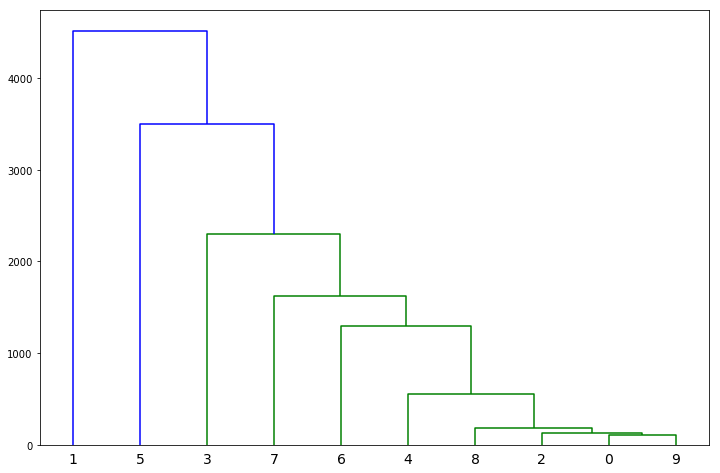

In [97]:
Z_lda = linkage(lda.components_, 'complete')
plt.figure(figsize=(12, 8))
dendrogram(Z_lda, leaf_font_size=14)
plt.show()

In [99]:
# Normalizar la matriz de coeficientes
lda_topics_norm = lda_topics / np.sum(lda_topics, axis=1, keepdims=True) 

# Obtener los títulos de los documentos
page_titles = np.asarray(list(enfDf.nombre
Z_lda = linkage(lda_topics, 'complete')
plt.figure(figsize=(16, 8))
dendrogram(
    Z_lda,
    truncate_mode='lastp',  # mostrar sólo los últims p clusters
    p=20,                   
    show_leaf_counts=True,  # mostrar entre paréntesis el número de elementos en cada cluster
    leaf_font_size=14.,
)
plt.show()))

num_groups = len(set(page_titles))
lda_topics_grouped = np.zeros((num_groups, num_topics))
for i, name in enumerate(sorted(set(page_titles))):
    # Promedios, útiles cuando hay documentos con títulos repetidos
    lda_topics_grouped[i, :] = np.mean(lda_topics_norm[page_titles == name, :], axis=0)

lda_pages = pd.DataFrame(data=lda_topics_grouped, index=page_titles, 
                   columns=["T" + str(i) for i in range(num_topics)])

display(lda_pages[0:20])

,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9
Infantilismo,0.001190,0.970432,0.001190,0.001191,0.001190,0.001191,0.020044,0.001191,0.001190,0.001190
Pectus excavatum,0.001299,0.988310,0.001299,0.001299,0.001299,0.001299,0.001299,0.001299,0.001299,0.001299
Pectus carinatum,0.001408,0.123822,0.001408,0.001409,0.001408,0.104101,0.001409,0.371741,0.001408,0.391884
Onfalocele,0.001639,0.330200,0.001639,0.467939,0.001640,0.190384,0.001640,0.001640,0.001640,0.001639
Período prepatogénico,0.000617,0.000617,0.000617,0.196317,0.000617,0.798744,0.000617,0.000617,0.000617,0.000617
Enfermedad gastrointestinal,0.000162,0.000162,0.000162,0.984731,0.002337,0.011796,0.000162,0.000162,0.000162,0.000162
Mal de montaña crónico,0.001786,0.826508,0.001786,0.001786,0.001786,0.001787,0.001786,0.001786,0.001786,0.159205
Fibrosis,0.001613,0.956487,0.001613,0.001614,0.001613,0.001613,0.001613,0.030608,0.001613,0.001613
Meteoropatía,0.001852,0.530548,0.001852,0.339951,0.022684,0.001852,0.001852,0.095705,0.001852,0.001852
Linfangitis,0.001538,0.986153,0.001538,0.001539,0.001539,0.001539,0.001539,0.001539,0.001538,0.001538


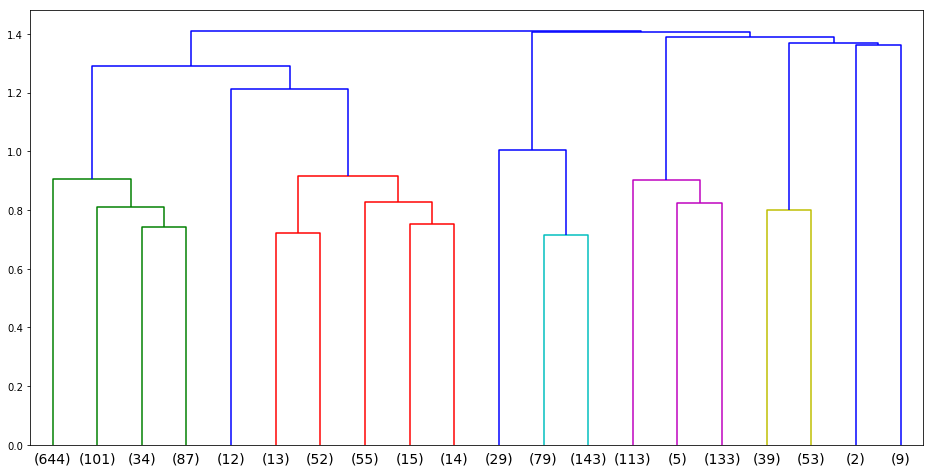

In [100]:
Z_lda = linkage(lda_topics, 'complete')
plt.figure(figsize=(16, 8))
dendrogram(
    Z_lda,
    truncate_mode='lastp',  # mostrar sólo los últims p clusters
    p=20,                   
    show_leaf_counts=True,  # mostrar entre paréntesis el número de elementos en cada cluster
    leaf_font_size=14.,
)
plt.show()

In [101]:

# Atributos originales a mostrar en cada vector de características, 
# ordenados por importancia       
num_top_words = 50
nmf_topic_words = []
for topic in nmf.components_:
    word_idx = np.argsort(topic)[::-1][0:num_top_words]
    nmf_topic_words.append([X_vocab[i] for i in word_idx])

for i, row in zip(range(len(nmf_topic_words)), nmf_topic_words):
    print(i, row, "\n")

0 ['gluten', 'dieta', 'enfermedad_celíaca', 'celíacos', 'presencia', 'sensibilidad', 'alimentos', 'casos', 'pacientes', 'dsg', 'style_background', 'celíaca', 'biopsias_duodenales', 'productos', 'diagnóstico', 'atrofia', 'síntomas', 'especialmente', 'adultos', 'solo', 'valign_top', 'prueba', 'incluso', 'vida', 'anticuerpos', 'align_center', 'actualmente', 'hla', 'etc', 'forma', 'paciente', 'años', 'avena', 'marsh', 'serología', 'marcadores', 'aparición', 'general', 'contaminación', 'intestinal', 'trigo', 'intolerancia', 'niños_mayores', 'riesgo', 'tales', 'niños', 'mejoría', 'cruzada', 'completa', 'contaminaciones'] 

1 ['cáncer', 'pulmón', 'mama', 'tumor', 'células', 'tumores', 'tabaco', 'metástasis', 'tratamiento', 'riesgo', 'cánceres', 'mujeres', 'crecimiento', 'carcinoma', 'aparición', 'quimioterapia', 'células_pequeñas', 'casos', 'fumadores', 'pacientes', 'consultado', 'cancer', 'factores', 'bgcolor', 'diagnóstico', 'incidencia', 'mortalidad', 'exposición', 'posible', 'páncreas', '

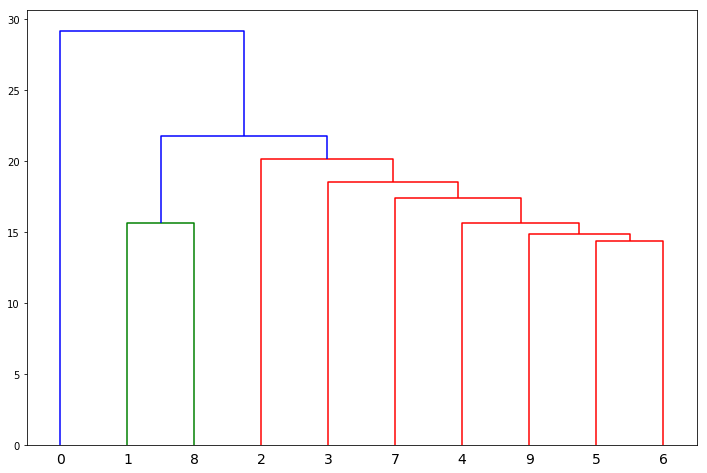

In [102]:
Z_nmf = linkage(nmf.components_, 'complete')
plt.figure(figsize=(12, 8))
dendrogram(Z_nmf, leaf_font_size=14)
plt.show()

In [104]:
# Normalizar la matriz de coeficientes
nmf_topic_norm = nmf_topics / np.sum(nmf_topics, axis=1, keepdims=True) 

# Obtener los títulos de los documentos
page_titles = np.asarray(list(enfDf.nombre))

num_groups = len(set(page_titles))
nmf_topic_grouped = np.zeros((num_groups, num_topics))
for i, name in enumerate(sorted(set(page_titles))):
    # Promedios, útiles cuando hay documentos con títulos repetidos
    nmf_topic_grouped[i, :] = np.mean(nmf_topic_norm[page_titles == name, :], axis=0)

nmf_pages = pd.DataFrame(data=nmf_topic_grouped, index=page_titles, 
                   columns=["T" + str(i) for i in range(num_topics)])

display(nmf_pages[0:20])

,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9
Infantilismo,0.036427,0.013265,0.000000,0.052983,0.175785,0.571684,0.000000,0.000000,0.000000,0.149856
Pectus excavatum,0.028877,0.000000,0.086199,0.005936,0.340842,0.233296,0.199837,0.000000,0.000000,0.105014
Pectus carinatum,0.329139,0.148520,0.000000,0.000000,0.017566,0.079610,0.110016,0.315148,0.000000,0.000000
Onfalocele,0.012326,0.000000,0.000000,0.001036,0.169254,0.194355,0.076811,0.035570,0.246602,0.264046
Período prepatogénico,0.019121,0.165216,0.024726,0.055600,0.182756,0.075784,0.200880,0.055505,0.099227,0.121184
Enfermedad gastrointestinal,0.019332,0.049482,0.115503,0.005214,0.335107,0.067184,0.127656,0.025034,0.115160,0.140328
Mal de montaña crónico,0.063262,0.040650,0.109758,0.015038,0.078438,0.298036,0.362253,0.000000,0.000000,0.032564
Fibrosis,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Meteoropatía,0.000000,0.000000,0.060168,0.004802,0.650922,0.000000,0.063089,0.000000,0.098596,0.122423
Linfangitis,0.095640,0.018189,0.056716,0.019988,0.145382,0.267272,0.268777,0.000000,0.023495,0.104540


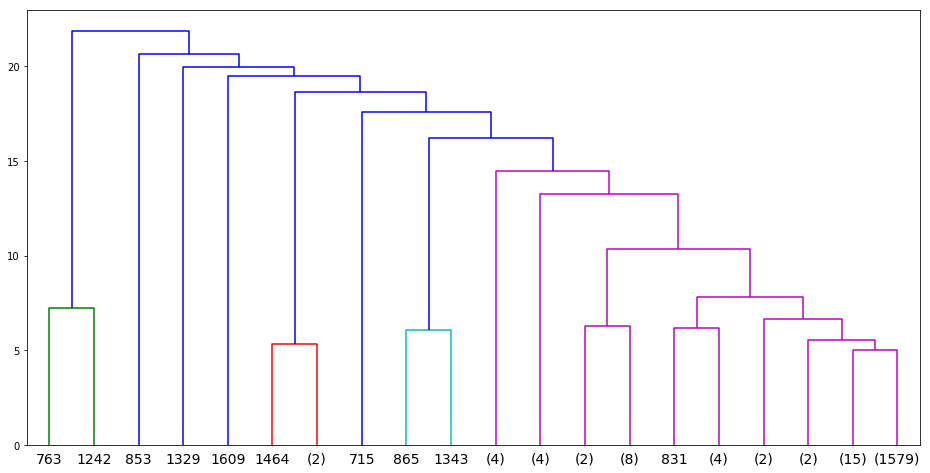

In [105]:
Z_nmf = linkage(nmf_topics, 'complete')
plt.figure(figsize=(16, 8))
dendrogram(
    Z_nmf,
    truncate_mode='lastp',  # mostrar sólo los últims p clusters
    p=20,                   
    show_leaf_counts=True,  # mostrar entre paréntesis el número de elementos en cada cluster
    leaf_font_size=14.,
)
plt.show()

In [107]:
enfDf.to_json("datos/lexicon_enfermedades_limpio.json", orient='records')

## Conclusiones

Sin duda estas tecnicas de identificación de topicos, han mejorado mucho el lexicon reduciendolo para asi afinar detalles en ciertas palabras que carecen de algun sentido, puesto que la identificación de tópicos es una de las herramientas de análisis semántico dando como resultado de este proceso un conjunto de "conceptos" que permiten:
1. Organizar los documentos en una estructura de discurso 
2. Reducir la dimensionalidad del problema para etapas futuras.